In [2]:
%matplotlib inline

In [3]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import astropy.constants as const
c = const.c.cgs.value

In [4]:
# BHR71
# corrected = '/Users/yaolun/bhr71/fitting/BHR71/spire/data/fits/bhr71_spire_corrected.fits'
corrected = '/Users/yaolun/bhr71/bhr71_SECT/spire_bhr71_corrected_32asGRB.fits'
extended = '/Users/yaolun/bhr71/fitting/BHR71/spire/data/fits/1342248249_HR_spectrum_extended_apod.fits'
point = '/Users/yaolun/bhr71/fitting/BHR71/spire/data/fits/1342248249_HR_spectrum_point_apod.fits'
corrected_16as = '/Users/yaolun/bhr71/bhr71_SECT/bhr71_16as_beam.fits'

# L1157
# corrected = '/Users/yaolun/test/L1157/l1157_spire_corrected.fits'
# extended = '/Users/yaolun/test/L1157/1342247625_HR_spectrum_extended_apod.fits'
# point = '/Users/yaolun/test/L1157/1342247625_HR_spectrum_point_apod.fits'

hdu_corrected = fits.open(corrected) # SLWC3:  2; SSWD4:  3 for BHR71; for others, SLWC3: 5, SSWD4: 18 
hdu_extended = fits.open(extended)   # SLWC3: 11; SSWD4: 39
hdu_point = fits.open(point)         # SLWC3:  5; SSWD4: 18
hdu_16as = fits.open(corrected_16as)

pix_slw = np.pi/4.*34**2
pix_ssw = np.pi/4.*19**2

# get the spectra from FITS file
# BHR71
wl_slw_cor = c/1e5/hdu_corrected[2].data.field(0)[3:-3]
flux_slw_cor = hdu_corrected[2].data.field(1)[3:-3]
wl_ssw_cor = c/1e5/hdu_corrected[3].data.field(0)[3:-3]
flux_ssw_cor = hdu_corrected[3].data.field(1)[3:-3]
# other
# wl_slw_cor = c/1e5/hdu_corrected[5].data.field(0)[3:-3]
# flux_slw_cor = hdu_corrected[5].data.field(1)[3:-3]
# wl_ssw_cor = c/1e5/hdu_corrected[18].data.field(0)[3:-3]
# flux_ssw_cor = hdu_corrected[18].data.field(1)[3:-3]

wl_slw_16as = c/1e5/hdu_16as[2].data.field(0)[3:-3]
flux_slw_16as = hdu_16as[2].data.field(1)[3:-3]
wl_ssw_16as = c/1e5/hdu_16as[3].data.field(0)[3:-3]
flux_ssw_16as = hdu_16as[3].data.field(1)[3:-3]

wl_slw_ext = c/1e5/hdu_extended[11].data.field(0)
flux_slw_ext = hdu_extended[11].data.field(1)*pix_slw*(np.pi/180./3600.)**2*1e26
wl_ssw_ext = c/1e5/hdu_extended[39].data.field(0)
flux_ssw_ext = hdu_extended[39].data.field(1)*pix_ssw*(np.pi/180./3600.)**2*1e26

wl_slw_pot = c/1e5/hdu_point[5].data.field(0)
flux_slw_pot = hdu_point[5].data.field(1)
wl_ssw_pot = c/1e5/hdu_point[18].data.field(0)
flux_ssw_pot = hdu_point[18].data.field(1)

In [46]:
from astropy.io import ascii
# read PACS spectrum
wl_pacs, flux_pacs = np.genfromtxt(
    '/Users/yaolun/bhr71/data/Herschel_spec/BHR71_central9Spaxels_PointSourceCorrected_trim.txt',\
    skip_header=1).T

# read HSA products
pacs_spec = []
pacs_ver = 'spec3x3'
for cam in ['b1','b2','r1','r2']:
    pacs_spec.append(ascii.read('/Users/yaolun/bhr71/calibration_testing/HSA/BHR71_'+pacs_ver+'_'+cam+'.txt',
                                data_start=4, names=['wave','flux']))

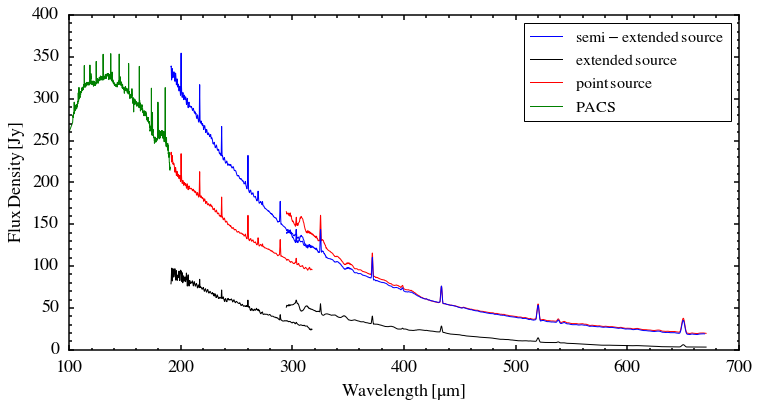

In [48]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ext, = ax.plot(wl_slw_ext, flux_slw_ext, 'k-', linewidth=1)
ax.plot(wl_ssw_ext, flux_ssw_ext, 'k-', linewidth=1)
pot, = ax.plot(wl_slw_pot, flux_slw_pot, 'r-', linewidth=1)
ax.plot(wl_ssw_pot, flux_ssw_pot, 'r-', linewidth=1)
cor, = ax.plot(wl_slw_cor, flux_slw_cor, 'b-', linewidth=1)
ax.plot(wl_ssw_cor, flux_ssw_cor, 'b-', linewidth=1)
# cor_16as, = ax.plot(wl_slw_16as, flux_slw_16as, '-', color='Magenta', linewidth=1)
# ax.plot(wl_ssw_16as, flux_ssw_16as, '-', color='Magenta', linewidth=1)

# PACS
pacs, = ax.plot(wl_pacs, flux_pacs, 'g-', linewidth=1)
# for i in range(len(pacs_spec)):
#     pacs_hsa, = ax.plot(pacs_spec[i]['wave'], pacs_spec[i]['flux'], color='g', linestyle='-', linewidth=0.7)

ax.legend([cor, ext, pot, pacs], \
          [r'$\rm{semi-extended\,source}$', r'$\rm{extended\,source}$', r'$\rm{point\,source}$', r'$\rm{PACS}$'],\
          numpoints=1, loc='best', fontsize=16)
ax.set_xlim([100, 700])
ax.set_xlabel(r'$\rm{Wavelength\,[\mu m]}$', fontsize=18)
ax.set_ylabel(r'$\rm{Flux\,Density\,[Jy]}$', fontsize=18)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=10,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=10,length=2.5)

fig.savefig('/Users/yaolun/test/spire_correction_com.pdf', format='pdf', dpi=300, bbox_inches='tight')

## Experiment about SPIRE point source corrected datacube

In [7]:
filename = '/Users/yaolun/bhr71/fitting/BHR71/spire/data/fits/1342248249_HR_spectrum_point_apod.fits'
hdu = fits.open(filename)

In [8]:
# SLW
wl_slw_sum = c/1e5/hdu[2].data.field(0)
flux_slw_sum = np.zeros_like(hdu[2].data.field(1))
for i in range(2,9):
    flux_slw_sum += hdu[i].data.field(1)
    
# SSW
wl_ssw_sum = c/1e5/hdu[13].data.field(0)
flux_ssw_sum = np.zeros_like(hdu[13].data.field(1))
for i in [13,14,17,18,21,22]:
    flux_ssw_sum += hdu[i].data.field(1)

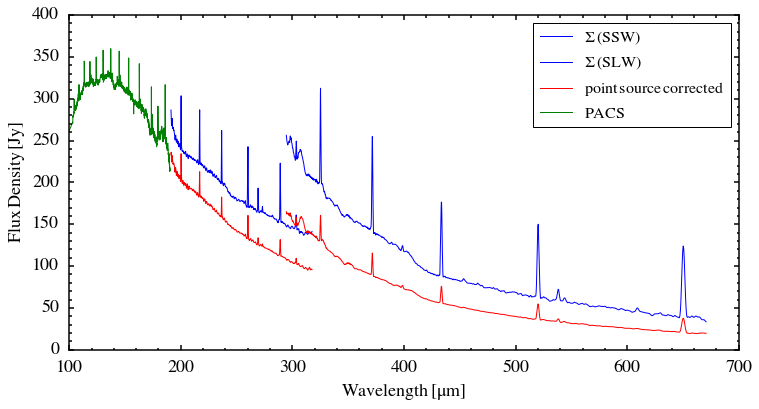

In [9]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ax.plot(wl_ssw_sum, flux_ssw_sum, 'b-', label=r'$\rm{\Sigma\,(SSW)}$')
ax.plot(wl_slw_sum, flux_slw_sum, 'b-', label=r'$\rm{\Sigma\,(SLW)}$')

pot, = ax.plot(wl_slw_pot, flux_slw_pot, 'r-', label=r'$\rm{point\,source\,corrected}$')
ax.plot(wl_ssw_pot, flux_ssw_pot, 'r-')
# PACS
pacs, = ax.plot(wl_pacs, flux_pacs, 'g-', label=r'$\rm{PACS}$')

ax.legend(numpoints=1, loc='best', fontsize=16)
ax.set_xlim([100, 700])
ax.set_xlabel(r'$\rm{Wavelength\,[\mu m]}$', fontsize=18)
ax.set_ylabel(r'$\rm{Flux\,Density\,[Jy]}$', fontsize=18)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=10,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=10,length=2.5)


## Weight the SPIRE spaxel based on a reference Gaussian beam with an equivalent aperture of PACS 3x3 aperture

In [10]:
# A re-sample function
def resample(x, skip=1, freq=False):
    # need to resample in frequency space
    import astropy.constants as const
    c = const.c.cgs.value
    # assume x in um
    if not freq:
        x = c/x
    xx = []
    for i in range(len(x)):
        if i % skip == 0:
            xx.append(x[i])
    if not freq:
        xx = c/np.array(xx)
    return xx

def gauss2d(x, y, sigmax, sigmay=None):
    # sigmax needs to be in pixel coordinates
    if sigmay == None:
        sigmay = sigmax
    return 1/(2*np.pi*sigmax*sigmay) * np.exp( -(x**2/2./sigmax**2 + y**2/2./sigmay**2) )

def gridding(gauss_beam, size=1201., phys_size=120.):
    # gauss_beam is the FWHM of the Gaussian
    
    grid_x, grid_y = np.meshgrid(np.linspace(0,size-1,size), np.linspace(0,size-1,size))
    grid_x = grid_x - (size-1)/2.
    grid_y = grid_y - (size-1)/2.
    grid_gauss2d = gauss2d(grid_x,grid_y, sigmax=(size-1)/phys_size*(gauss_beam/2.354))
    dA = ((1/((size-1)/2.))*phys_size)**2
    
    return (grid_x, grid_y, grid_gauss2d)

# Numerically Gaussian integral within a certain aperture at a given location
# map a 120" x 120" grid with 1200 x 1200 pixels
def Gaussian_anywhere(grid, ra_offset, dec_offset, pixel_aper, size=1201., phys_size=120.):
    grid_x, grid_y, grid_gauss2d = grid
    
    # convert from physcial coordinates to pixel coordinates
    x = (ra_offset-phys_size/2.) * (size-1)/2./(phys_size/2.) + (size-1)/2.
    y = (dec_offset-phys_size/2.) * (size-1)/2./(phys_size/2.) + (size-1)/2.
    r_pix = (pixel_aper/2.) * (size-1)/phys_size
    grid_dist = ((grid_x-x)**2+(grid_y-y)**2)**0.5
    gauss2d_mask = np.where(grid_dist<=r_pix, grid_gauss2d,0)
    
    return np.sum(gauss2d_mask)

 SPIRE 250, 350, and 500 um: 17.001053 36.5897227218 34.000117
convolved with 15.5" beam: 23.0062122721 39.737360366 37.3665352423


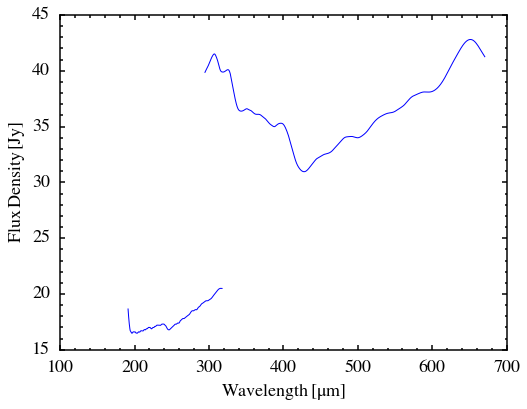

In [7]:
# read in the SSW beam profile
wl_ssw_beam, diam_ssw_beam = np.genfromtxt('/Users/yaolun/test/SSW_beam_profile.txt').T

# read in the SLW beam profile
wl_slw_beam, diam_slw_beam = np.genfromtxt('/Users/yaolun/test/SLW_beam_profile.txt').T

# plot beam profiles
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(wl_ssw_beam, diam_ssw_beam, 'b-')
ax.plot(wl_slw_beam, diam_slw_beam, 'b-')

ax.set_xlim([100, 700])
ax.set_xlabel(r'$\rm{Wavelength\,[\mu m]}$', fontsize=18)
ax.set_ylabel(r'$\rm{Flux\,Density\,[Jy]}$', fontsize=18)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=10,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=10,length=2.5)

from scipy.interpolate import interp1d
f_ssw = interp1d(wl_ssw_beam, diam_ssw_beam)
f_slw = interp1d(wl_slw_beam, diam_slw_beam)

print 'SPIRE 250, 350, and 500 um:', f_ssw(250.), f_slw(350.), f_slw(500.)
# They are all FWHM
print 'convolved with 15.5" beam:', (15.5**2+f_ssw(250.)**2)**0.5,\
                                    (15.5**2+f_slw(350.)**2)**0.5,\
                                    (15.5**2+f_slw(500.)**2)**0.5

## Calculate the ratio of SSW and SLW configurations under a reference Gaussian beam

In [33]:
hdu = fits.open('/Users/yaolun/bhr71/calibration_testing/HSA/bhr71_spire_point_apod.fits')
cen_ra = hdu[18].header['RA']
cen_dec = hdu[18].header['DEC']

avg_ssw = np.mean(diam_ssw_beam)
avg_slw = np.mean(diam_slw_beam)
print avg_ssw, avg_slw
print (17*min(diam_ssw_beam)**2)/(7*min(diam_slw_beam)**2), (17*max(diam_ssw_beam)**2)/(7*max(diam_slw_beam)**2)

grid = gridding(26.5, size=1201., phys_size=120.)

# SSW
ssw_area = 0
ssw_cen_area = Gaussian_anywhere(grid, 0, 0, avg_ssw)
for i in range(9,26):
    ra_dum = (hdu[i].header['RA']-cen_ra)*np.cos(np.radians(cen_dec))*3600.
    dec_dum = (hdu[i].header['DEC']-cen_dec) * 3600.
    ssw_area += Gaussian_anywhere(grid, ra_dum, dec_dum, avg_ssw)
    
# SLW
slw_area = 0
slw_cen_area = Gaussian_anywhere(grid, 0, 0, avg_slw)
for j in range(2,10):
    ra_dum = (hdu[j].header['RA']-cen_ra)*np.cos(np.radians(cen_dec))*3600.
    dec_dum = (hdu[j].header['DEC']-cen_dec) * 3600.
    slw_area += Gaussian_anywhere(grid, ra_dum, dec_dum, avg_slw)

print ssw_cen_area, slw_cen_area
print ssw_area, slw_area, ssw_area/slw_area

17.5991941422 36.5689734735
0.688230466032 0.557418791381
0.263088133579 0.732521577539
0.296728242597 0.734393623959 0.40404523258


### setup the Gaussian reference beam

In [36]:
beam_size = 26.5
grid = gridding(beam_size, size=1201., phys_size=120.)

### SSW

In [37]:
ref_ssw = min(diam_ssw_beam)
filename = '/Users/yaolun/bhr71/calibration_testing/HSA/bhr71_spire_point_apod.fits'
hdu = fits.open(filename)

from scipy.interpolate import interp1d
f = interp1d(wl_ssw_beam, diam_ssw_beam)

cen_ra = hdu[18].header['RA']
cen_dec = hdu[18].header['DEC']

wave = c/1e5/hdu[18].data.field(0)
weight_ssw = np.zeros((len(np.arange(9,26)),len(wave)))
weight_ssw_cen = np.zeros(len(wave))
weight_ssw_dum = np.zeros(len(wave))
beam_ref = np.zeros_like(np.arange(9,26))

ind_cen = 18
#
ra_cen = (hdu[ind_cen].header['RA']-cen_ra)*np.cos(np.radians(cen_dec)) * 3600.
dec_cen = (hdu[ind_cen].header['DEC']-cen_dec) * 3600.

# for the center spaxel only
for iw in range(len(wave)):
    weight_ssw_cen[iw] = Gaussian_anywhere(grid, ra_cen, dec_cen, diam_ssw_beam[iw])
#

s = 0
for i in range(9,26):
    ra_dum = (hdu[i].header['RA']-cen_ra)*np.cos(np.radians(cen_dec))*3600.
    dec_dum = (hdu[i].header['DEC']-cen_dec) * 3600.
    
    for iw in range(len(wave)):
        weight_ssw[s,iw] = Gaussian_anywhere(grid, ra_dum, dec_dum, diam_ssw_beam[iw]) / weight_ssw_cen[iw]
    s += 1

In [38]:
for j in range(len(weight_ssw[0,:])):
    weight_ssw[:,j] = weight_ssw[:,j]/max(weight_ssw[:,j])

# create empty arrays and apply the weighting
wl_ssw_wsum = c/1e5/hdu[18].data.field(0)
flux_ssw_wsum = np.zeros_like(wl_ssw_wsum)

for iw in range(len(wl_ssw_wsum)):
    s = 0
    for i in range(9,26):
        flux_dum = hdu[i].data.field(1)
        flux_ssw_wsum[iw] += flux_dum[iw] * weight_ssw[s,iw]
        s += 1

# sort the spectrum with the increase of wavelength
sorter = np.argsort(wl_ssw_wsum)
wl_ssw_wsum = wl_ssw_wsum[sorter]
flux_ssw_wsum = flux_ssw_wsum[sorter]

# trim the spectrum like SPIRE-1D spectra in CDF archive
flux_ssw_wsum = flux_ssw_wsum[(wl_ssw_wsum >= 195.) & (wl_ssw_wsum < 310.)]
wl_ssw_wsum = wl_ssw_wsum[(wl_ssw_wsum >= 195.) & (wl_ssw_wsum < 310.)]

# write the summed spectrum into ASCII file
foo = open('/Users/yaolun/bhr71/bhr71_SECT/bhr71_ssw_weighted_sum.txt','w')
for wave in wl_ssw_wsum:
    foo.write('{} \t {}\n'.format(wave, flux_ssw_wsum[wl_ssw_wsum == wave][0]))
foo.close()

# save the SSW weight array
np.save('/Users/yaolun/bhr71/bhr71_ssw_weight', weight_ssw)
# For loading in
# data = np.load('/Users/yaolun/bhr71/bhr71_ssw_weight.npy')

### SLW

In [39]:
ref_slw = min(diam_slw_beam)
cen_ra = hdu[5].header['RA']
cen_dec = hdu[5].header['DEC']

wave = c/1e5/hdu[5].data.field(0)
weight_slw = np.zeros((7,len(wave)))
weight_slw_cen = np.zeros(len(wave))
beam_ref = np.zeros(7)

ind_cen = 5
#
ra_cen = (hdu[ind_cen].header['RA']-cen_ra)*np.cos(np.radians(cen_dec)) * 3600.
dec_cen = (hdu[ind_cen].header['DEC']-cen_dec) * 3600.

# for the center spaxel only
for iw in range(len(wave)):
    weight_slw_cen[iw] = Gaussian_anywhere(grid, ra_cen, dec_cen, diam_slw_beam[iw])
#

s = 0
for i in [2,3,4,5,6,7,8]:
    ra_dum = (hdu[i].header['RA']-cen_ra)*np.cos(np.radians(cen_dec))*3600.
    dec_dum = (hdu[i].header['DEC']-cen_dec) * 3600.
    
    for iw in range(len(wave)):
        weight_slw[s,iw] = Gaussian_anywhere(grid, ra_dum, dec_dum, diam_ssw_beam[iw])/weight_slw_cen[iw]
    s += 1
    
for j in range(len(weight_slw[0,:])):
    weight_slw[:,j] = weight_slw[:,j]/max(weight_slw[:,j])
    
# create empty arrays and apply the weighting
wl_slw_wsum = c/1e5/hdu[5].data.field(0)
flux_slw_wsum = np.zeros_like(wl_slw_wsum)

for iw in range(len(wl_slw_wsum)):
    s = 0
    for i in [2,3,4,5,6,7,8]:
        flux_dum = hdu[i].data.field(1)
        flux_slw_wsum[iw] += flux_dum[iw] * weight_slw[s,iw]
        s += 1
        
# sort the spectrum with the increase of wavelength
sorter = np.argsort(wl_slw_wsum)
wl_slw_wsum = wl_slw_wsum[sorter]
flux_slw_wsum = flux_slw_wsum[sorter]

# trim the spectrum like SPIRE-1D spectra in CDF archive
flux_slw_wsum = flux_slw_wsum[wl_slw_wsum >= 310.]
wl_slw_wsum = wl_slw_wsum[wl_slw_wsum >= 310.]

# write the summed spectrum into ASCII file
foo = open('/Users/yaolun/bhr71/bhr71_SECT/bhr71_slw_weighted_sum.txt','w')
for wave in wl_slw_wsum:
    foo.write('{} \t {}\n'.format(wave, flux_slw_wsum[wl_slw_wsum == wave][0]))
foo.close()

In [40]:
for i in range(len(weight_slw[:,0])):
    print i, max(weight_slw[i,:])

0 0.000484975360194
1 0.000167911854309
2 0.000125589381046
3 1.0
4 0.000184989384006
5 8.2779719902e-05
6 0.000371775373613


In [41]:
# save the SLW weight array
np.save('/Users/yaolun/bhr71/bhr71_slw_weight', weight_slw)
# For loading in
# data = np.load('/Users/yaolun/bhr71/bhr71_slw_weight.npy')

## Go fit the continuum in IDL...

In [42]:
import pidly
idl = pidly.IDL('/Applications/exelis/idl83/bin/idl')
idl('.r /Users/yaolun/programs/line_fitting/extract_spire.pro')
idl('.r /Users/yaolun/programs/line_fitting/gauss.pro')

idl.pro('extract_spire', indir='~/bhr71/bhr71_SECT/', filename='bhr71_ssw_weighted_sum',
        outdir='~/bhr71/bhr71_SECT/fitting_weighted/bhr71_ssw/', plotdir='~/bhr71/bhr71_SECT/fitting_weighted/plots/',
        localbaseline=10, global_noise=20, ra=0, dec=0, noiselevel=3, fx=1, object='BHR71_ssw', flat=1,
        continuum_sub=1, double_gauss=1, no_plot=0)

idl.pro('extract_spire', indir='~/bhr71/bhr71_SECT/', filename='bhr71_slw_weighted_sum',
        outdir='~/bhr71/bhr71_SECT/fitting_weighted/bhr71_slw/', plotdir='~/bhr71/bhr71_SECT/fitting_weighted/plots/',
        localbaseline=10, global_noise=20, ra=0, dec=0, noiselevel=3, fx=1, object='BHR71_slw', flat=1,
        continuum_sub=1, double_gauss=1, no_plot=0)

% Compiled module: EXTRACT_SPIRE.
% Compiled module: GAUSS.
% Compiled module: READCOL.
% Compiled module: REMCHAR.
% Compiled module: GETTOK.
% Compiled module: STRNUMBER.
% Compiled module: FIT_LINE.
% Compiled module: MPFITFUN.
% Compiled module: MPFIT.
% Compiled module: BASE2D.
% Compiled module: AL_LEGEND.
% Compiled module: CGCHECKFORSYMBOLS.
% Compiled module: SETDEFAULTVALUE.
% Compiled module: CGPLOTS.
% Compiled module: SETDECOMPOSEDSTATE.
% Compiled module: DECOMPOSEDCOLOR.
% Compiled module: CGDEFAULTCOLOR.
% Compiled module: GETDECOMPOSEDSTATE.
% Compiled module: CGCOLOR24.
% Compiled module: CGTEXT.
% Compiled module: CGDEFCHARSIZE.
% Compiled module: CGCOLOR.
% Compiled module: INTERPOL.
% Compiled module: TITLE_NAME.
% Compiled module: READ_LINE_REF.
% Compiled module: GREEK.
% Compiled module: GAUSS_DOUBLE.
---> Re-calculating the noise level...
% Compiled module: SPEC_CONTINUUM_SMOOTH.
% Compiled module: DJS_REJECT.
% Compiled module: CLEANPLOT.
---> Re-calculating t

### Read in the continuum-only spectrum

In [43]:
wl_ssw_cont, flux_ssw_cont = np.genfromtxt(
    '/Users/yaolun/bhr71/BHR71_SECT/fitting_weighted/bhr71_ssw/bhr71_ssw_weighted_sum_continuum.txt',
    skip_header=1, dtype='float').T
wl_slw_cont, flux_slw_cont = np.genfromtxt(
    '/Users/yaolun/bhr71/BHR71_SECT/fitting_weighted/bhr71_slw/bhr71_slw_weighted_sum_continuum.txt',
    skip_header=1, dtype='float').T

In [65]:
# # compare with the SECT-corrected spectrum
# # SSW
# raw_ssw_ratio = flux_ssw_cont/flux_sect_ssw_cont
# raw_ssw_ratio = flux_ssw_wsum/flux_sect_ssw
# plt.plot(wl_ssw_cont, raw_ssw_ratio)
# from scipy.signal import savgol_filter
# # trim the spectrum because the smoothing requires the window length be an odd number

# ratio_ssw_smooth = savgol_filter(raw_ssw_ratio, len(raw_ssw_ratio), 4)
# plt.plot(wl_ssw_cont, ratio_ssw_smooth)

In [66]:
# # compare with the SECT-corrected spectrum
# # SLW
# raw_slw_ratio = flux_slw_cont/flux_sect_slw_cont
# raw_slw_ratio = flux_slw_wsum/flux_sect_slw
# plt.plot(wl_slw_cont, raw_slw_ratio)
# from scipy.signal import savgol_filter
# # trim the spectrum because the smoothing requires the window length be an odd number
# ratio_slw_smooth = savgol_filter(raw_slw_ratio, len(raw_slw_ratio), 4)
# plt.plot(wl_slw_cont, ratio_slw_smooth)

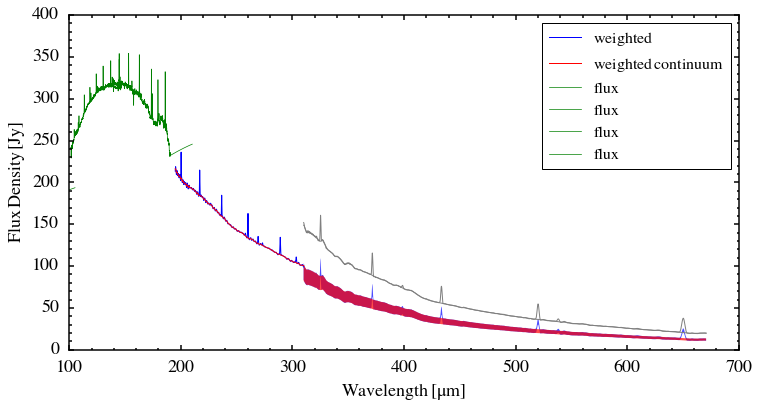

In [51]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# ax.plot(wl_ssw_sum, flux_ssw_sum, 'b-', label=r'$\rm{\Sigma\,(SSW)}$')
# ax.plot(wl_slw_sum, flux_slw_sum, 'b-', label=r'$\rm{\Sigma\,(SLW)}$')

ax.plot(wl_ssw_wsum, flux_ssw_wsum, '-', color='b', label=r'$\rm{weighted}$')
ax.plot(wl_slw_wsum, flux_slw_wsum, '-', color='Gray')
ax.fill_between(wl_slw_wsum, flux_slw_wsum*0.55, flux_slw_wsum*0.68, color='b', alpha=0.7, edgecolor='None')

ax.plot(wl_ssw_cont, flux_ssw_cont, '-', color='r', label=r'$\rm{weighted\,continuum}$')
ax.plot(wl_slw_cont, flux_slw_cont, '-', color='Gray')
ax.fill_between(wl_slw_wsum, flux_slw_cont*0.55, flux_slw_cont*0.68, color='r', alpha=0.7, edgecolor='None')

# ax.plot(c/1e5/hdu[5].data.field(0), hdu[5].data.field(1))

# ax.plot(wl_ssw_cor_cont, flux_ssw_cor_cont, 'm-', label=r'$\rm{SECT-corrected}$')

# ax.plot(wl_cor_raw, flux_cor_raw, 'k-', label=r'$\rm{SECT-corrected}$')

# ax.plot(wl_sect_ssw, flux_sect_ssw*ratio_ssw_smooth, color='Blue', linestyle='-', label=r'$\rm{corrected\,from\,SECT}$')
# ax.plot(wl_sect_slw, flux_sect_slw*ratio_slw_smooth, color='Blue', linestyle='-')

# pot, = ax.plot(wl_slw_pot, flux_slw_pot, '-', color='Orange', label=r'$\rm{point\,source\,corrected}$')
# ax.plot(wl_ssw_pot, flux_ssw_pot, '-', color='Orange')

# PACS
# pacs, = ax.plot(wl_pacs, flux_pacs, 'g-', label=r'$\rm{PACS}$')
for i in range(len(pacs_spec)):
    ax.plot(pacs_spec[i]['wave'], pacs_spec[i]['flux'], color='g', linestyle='-', linewidth=0.7)

# plot the smooth function
# smooth = plt.axes([0.47 ,0.55, 0.4, 0.32], frameon=True)
# smooth.plot(wl_sect_ssw, ratio_ssw_smooth, 'k-')
# smooth.plot(wl_sect_slw, ratio_slw_smooth, 'k-')
# smooth.set_xlim([190, 700])
# smooth.set_xlabel(r'$\rm{Wavelength\,[\mu m]}$', fontsize=12)
# smooth.set_ylabel(r'$\rm{Scaling\,factor}$', fontsize=12)

ax.legend(numpoints=1, loc='best', fontsize=16)
ax.set_xlim([100, 700])
ax.set_xlabel(r'$\rm{Wavelength\,[\mu m]}$', fontsize=18)
ax.set_ylabel(r'$\rm{Flux\,Density\,[Jy]}$', fontsize=18)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=10,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=10,length=2.5)

fig.savefig('/Users/yaolun/test/spire_sum_hsa.pdf',format='pdf',dpi=300, bbox_inches='tight')

In [29]:
# output the resulting spectrum
foo = open('/Users/yaolun/bhr71/bhr71_SECT/bhr71_spire_corrected_yly.txt','w')
foo.write('{} \t {}\n'.format('Wavelength(um)', 'Flux(Jy)'))
for i in range(len(wl_ssw_wsum)):
    foo.write('{} \t {}\n'.format(wl_ssw_wsum[i], flux_ssw_wsum[i]))
for i in range(len(wl_slw_wsum)):
    foo.write('{} \t {}\n'.format(wl_slw_wsum[i], flux_slw_wsum[i]*0.68))
foo.close()

# And fit again
import pidly
idl = pidly.IDL('/Applications/exelis/idl83/bin/idl')
idl('.r /Users/yaolun/programs/line_fitting/extract_spire.pro')
idl('.r /Users/yaolun/programs/line_fitting/gauss.pro')

idl.pro('extract_spire', indir='~/bhr71/bhr71_SECT/', filename='bhr71_spire_corrected_yly',
        outdir='~/bhr71/bhr71_SECT/fitting_weighted/bhr71/', plotdir='~/bhr71/bhr71_SECT/fitting_weighted/bhr71/plots/',
        localbaseline=10, global_noise=20, ra=0, dec=0, noiselevel=3, fx=1, object='BHR71', flat=1,
        continuum_sub=1, double_gauss=1, no_plot=0)

% Compiled module: EXTRACT_SPIRE.
% Compiled module: GAUSS.
% Compiled module: READCOL.
% Compiled module: REMCHAR.
% Compiled module: GETTOK.
% Compiled module: STRNUMBER.
% Compiled module: FIT_LINE.
% Compiled module: MPFITFUN.
% Compiled module: MPFIT.
% Compiled module: BASE2D.
% Compiled module: AL_LEGEND.
% Compiled module: CGCHECKFORSYMBOLS.
% Compiled module: SETDEFAULTVALUE.
% Compiled module: CGPLOTS.
% Compiled module: SETDECOMPOSEDSTATE.
% Compiled module: DECOMPOSEDCOLOR.
% Compiled module: CGDEFAULTCOLOR.
% Compiled module: GETDECOMPOSEDSTATE.
% Compiled module: CGCOLOR24.
% Compiled module: CGTEXT.
% Compiled module: CGDEFCHARSIZE.
% Compiled module: CGCOLOR.
% Compiled module: INTERPOL.
% Compiled module: TITLE_NAME.
% Compiled module: READ_LINE_REF.
% Compiled module: GREEK.
% Compiled module: GAUSS_DOUBLE.
---> Re-calculating the noise level...
% Compiled module: SPEC_CONTINUUM_SMOOTH.
% Compiled module: DJS_REJECT.
% Compiled module: CLEANPLOT.


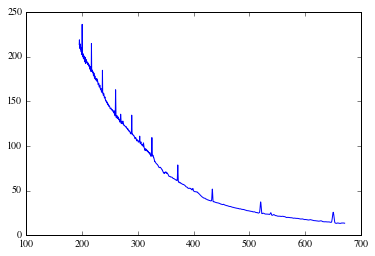

In [25]:
wl, flux = np.genfromtxt('/Users/yaolun/bhr71/bhr71_SECT/bhr71_spire_corrected_yly.txt', skip_header=1).T
plt.plot(wl, flux)